# Experiment 5: Aleatory Linear and Circle

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the database
# df = pd.read_csv("outputs/exp5_aleatory_linear_circle_9_9_10000/data.csv")
df = pd.read_csv("exp5_aleatory_linear_circle_9_9_10000.csv")
df.keys()

df.tail(7)

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
16794,8398,9,5,4,2,2,26,46,512,0.714475,0.001432,0.140162
16795,8398,9,5,3,2,2,27,54,512,0.743248,0.001666,0.465940
16796,8399,9,5,4,2,2,17,15,1,0.765753,0.001398,0.000980
16797,8399,9,5,3,2,2,18,18,1,0.817212,0.001569,0.001679
16798,8400,9,5,4,2,2,33,58,256,1.095912,0.001544,0.094181
16799,8400,9,5,3,2,2,36,72,512,1.149927,0.001718,0.822105
16800,8401,9,5,4,2,2,112,768,93843143,2.321471,0.001591,69313.623356


In [20]:
# Fixed the Unnamed colum
# df = df.rename(columns={'Unnamed: 0': 'id_register'})
# df['id_register'] = df['id_register'] + 1

# remove the last register without the two registers
df = df.iloc[:-1]

In [21]:
df.tail(10)

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
16790,8396,9,5,4,2,2,17,15,1,0.766666,0.001364,0.000962
16791,8396,9,5,3,2,2,18,18,1,0.805240,0.001526,0.001758
16792,8397,9,5,4,2,2,17,15,1,0.744416,0.001366,0.000989
16793,8397,9,5,3,2,2,18,18,1,0.779063,0.001660,0.001763
16794,8398,9,5,4,2,2,26,46,512,0.714475,0.001432,0.140162
16795,8398,9,5,3,2,2,27,54,512,0.743248,0.001666,0.465940
16796,8399,9,5,4,2,2,17,15,1,0.765753,0.001398,0.000980
16797,8399,9,5,3,2,2,18,18,1,0.817212,0.001569,0.001679
16798,8400,9,5,4,2,2,33,58,256,1.095912,0.001544,0.094181
16799,8400,9,5,3,2,2,36,72,512,1.149927,0.001718,0.822105


## Explore the data from by CBN topology: Linear(4) and Circular(3)

### The mean of the number of local attractors

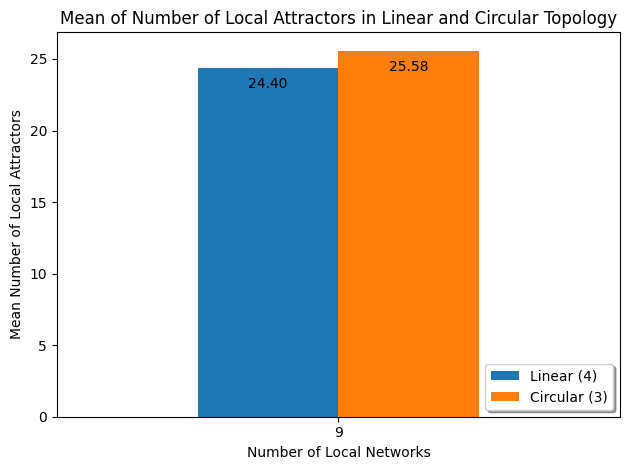

In [22]:
import matplotlib.pyplot as plt

# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_local_attractors'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Local Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Local Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


### The mean of the number of attractor pairs

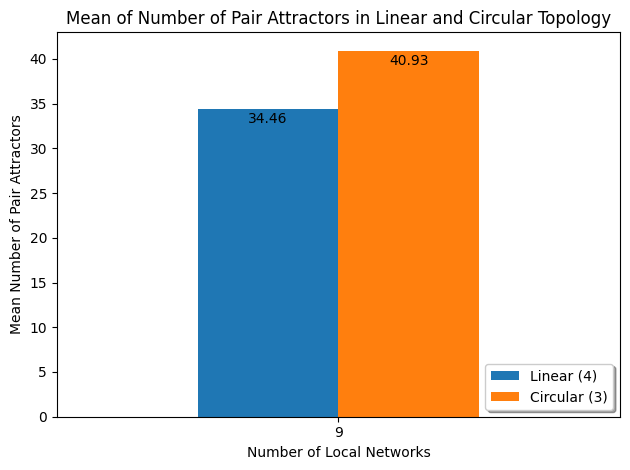

In [23]:
import matplotlib.pyplot as plt

# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_pair_attractors'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Pair Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Pair Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()

### The mean of the number of attractor fields

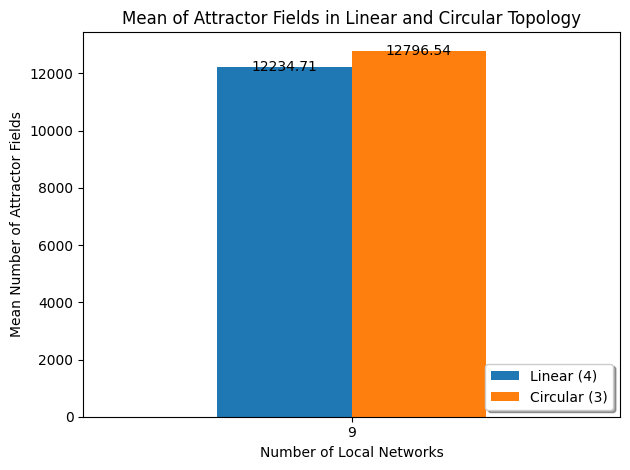

In [24]:
import matplotlib.pyplot as plt

# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_attractor_fields'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Attractor Fields')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Attractor Fields in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


## Individual Analysis by number of local networks

### Violin Graphs

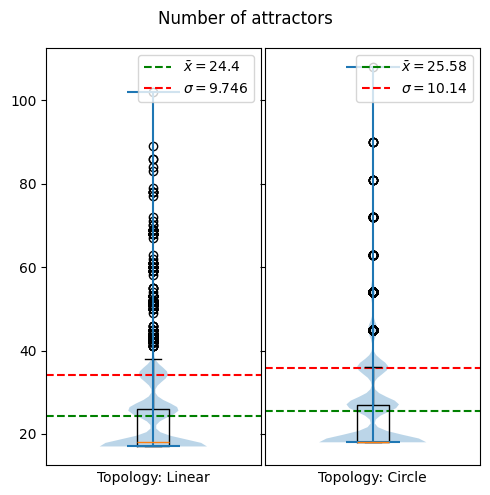

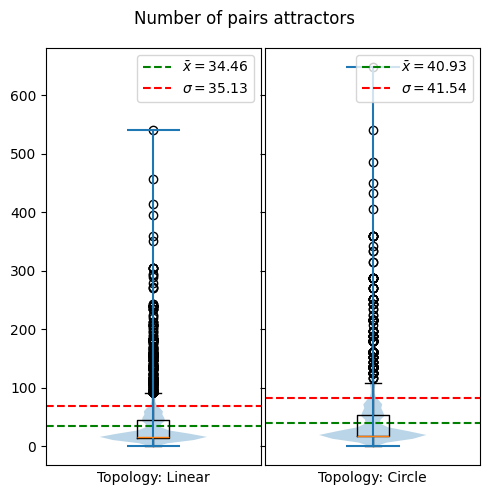

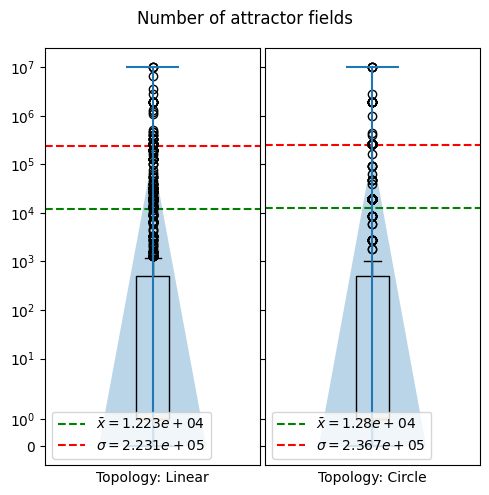

In [25]:
# Filter the graphs
df_local_networks_n = df[df['n_local_networks'] == 9]
# df_local_networks_n = df[df['n_local_networks'] == 4]
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_n['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_n.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_n.groupby("v_topology")

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True, figsize=(5, 5))
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)


### Top 20 Analysis

In [26]:
# filter by topology
df_v4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4]
df_v3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3]

# Select the 20 best df_v4 and df_v3 values for each metric
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')


In [27]:
top_20_v4_fields[['i_sample','n_attractor_fields']]

,i_sample,n_attractor_fields
6850,3426,10077696
9626,4814,10077696
14570,7286,10077696
4526,2264,6718464
4946,2474,3515625
8466,4234,2734375
542,272,1953125
1496,749,1953125
6658,3330,1953125
9146,4574,1953125


In [28]:
top_20_v3_fields[['i_sample','n_attractor_fields']]

,i_sample,n_attractor_fields
4527,2264,10077696
6851,3426,10077696
9627,4814,10077696
14571,7286,10077696
4987,2494,2744420
543,272,1953125
1497,749,1953125
1769,885,1953125
4947,2474,1953125
6659,3330,1953125


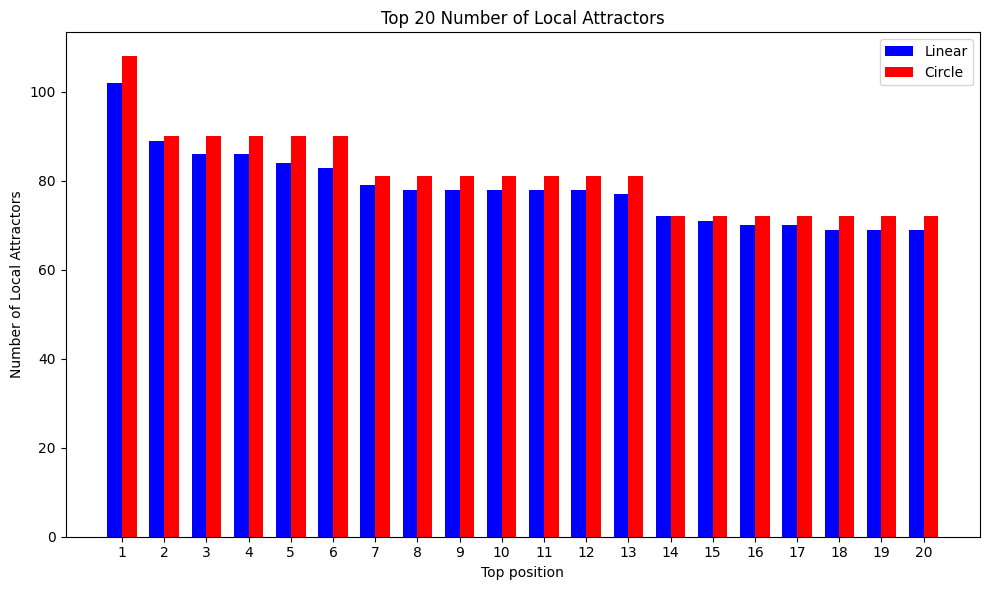

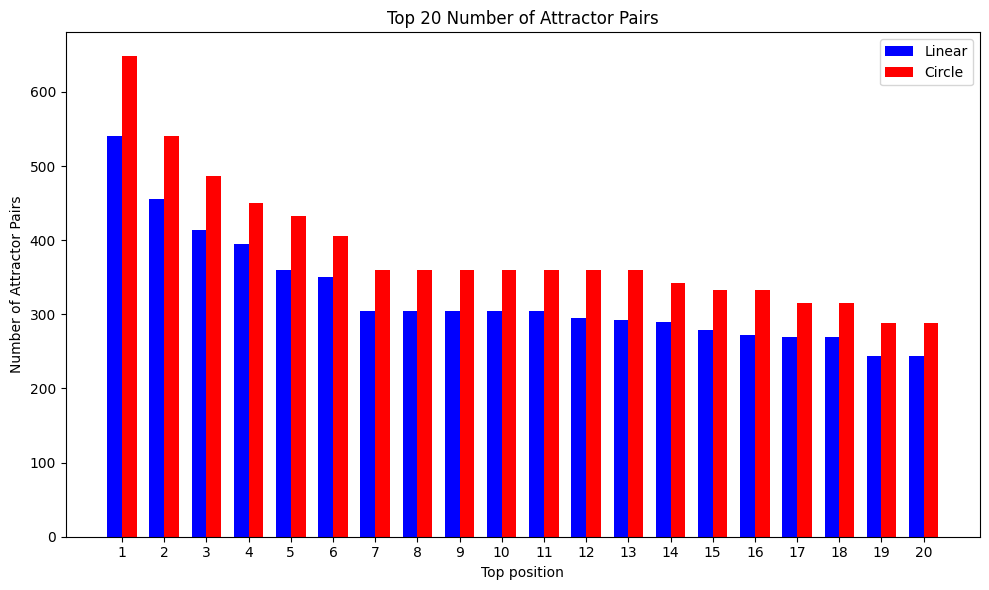

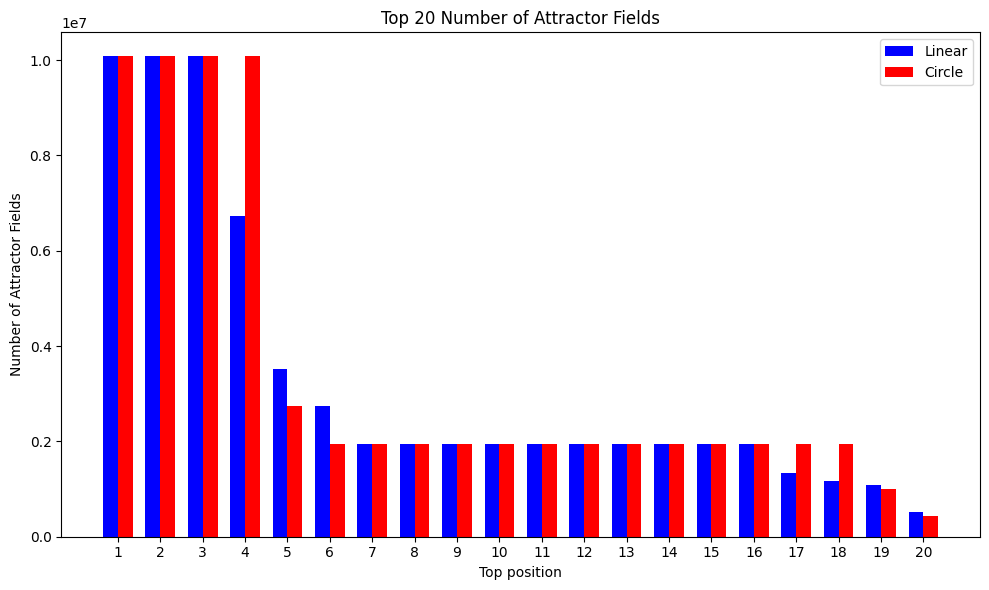

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Function to graph a specific metric
def plot_metric(df_linear, df_circle, metric, label_y, title):
    # Ordenar los DataFrames por la métrica (de mayor a menor)
    df_linear_sorted = df_linear.sort_values(metric, ascending=False)
    df_circle_sorted = df_circle.sort_values(metric, ascending=False)

    positions = np.arange(1, 21) 
    width = 0.35

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for Linear
    ax.bar(positions - width/2, df_linear_sorted[metric], width, label='Linear', color='blue')
    # Create bars for Circle
    ax.bar(positions + width/2, df_circle_sorted[metric], width, label='Circle', color='red')

    ax.set_title(f'Top 20 {title}')
    ax.set_ylabel(f'Number of {label_y}')  # Label on y axis
    ax.set_xlabel('Top position')  # Label on x axis
    ax.set_xticks(positions)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Graph for 'n_local_attractors
plot_metric(top_20_v4_attractors, top_20_v3_attractors, 'n_local_attractors', "Local Attractors", 'Number of Local Attractors')

# Chart for 'n_pair_attractors
plot_metric(top_20_v4_pairs, top_20_v3_pairs, 'n_pair_attractors', "Attractor Pairs", 'Number of Attractor Pairs')

# Graph for 'n_attractor_fields
plot_metric(top_20_v4_fields, top_20_v3_fields, 'n_attractor_fields', 'Attractor Fields', 'Number of Attractor Fields')


In [30]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    'linear_local_attractors' : df_topology_4['n_local_attractors'],
    'circle_local_attractors' : df_topology_3['n_local_attractors'],
    'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields']
    })
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()

,linear_local_attractors,circle_local_attractors,linear_attractors_pairs,circle_attractors_pairs,linear_attractors_fields,circle_attractors_fields
count,8400.000000,8400.000000,8400.000000,8400.000000,8.400000e+03,8.400000e+03
mean,24.402143,25.581429,34.457857,40.927500,1.223471e+04,1.279654e+04
std,9.746236,10.143713,35.130815,41.543039,2.231194e+05,2.367100e+05
min,17.000000,18.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,17.000000,18.000000,15.000000,18.000000,1.000000e+00,1.000000e+00
50%,18.000000,18.000000,16.000000,18.000000,1.000000e+00,1.000000e+00
75%,26.000000,27.000000,46.000000,54.000000,5.120000e+02,5.120000e+02
max,102.000000,108.000000,540.000000,648.000000,1.007770e+07,1.007770e+07


In [31]:
# Calculate the difference between circle_attractors_fields and linear_attractors_fields
df_resume['difference'] = df_resume['circle_attractors_fields'] - df_resume['linear_attractors_fields']

# Filter cases where circle_attractors_fields is greater than linear_attractors_fields
df_superior = df_resume[df_resume['circle_attractors_fields'] > df_resume['linear_attractors_fields']]

# Calculate the mean of the difference
mean_difference1 = (df_superior['circle_attractors_fields'] - df_superior['linear_attractors_fields']).mean()
mean_difference2 = (df_superior['linear_attractors_fields'] - df_superior['circle_attractors_fields']).mean()

# Print the result
print(f'Mean of the difference where the number of attractor fields Circle is greater than Linear: {mean_difference1}')

# Count the number of times circle_attractors_fields is greater, equal, and less than linear_attractors_fields
count_greater = (df_resume['circle_attractors_fields'] > df_resume['linear_attractors_fields']).sum()
count_equal = (df_resume['circle_attractors_fields'] == df_resume['linear_attractors_fields']).sum()
count_less = (df_resume['circle_attractors_fields'] < df_resume['linear_attractors_fields']).sum()

# Print the results
print(f'Number of times circle_attractors_fields is greater than linear_attractors_fields: {count_greater}')
print(f'Number of times circle_attractors_fields is equal to linear_attractors_fields: {count_equal}')
print(f'Number of times circle_attractors_fields is less than linear_attractors_fields: {count_less}')


Mean of the difference where the number of attractor fields Circle is greater than Linear: 14341.402190923318
Number of times circle_attractors_fields is greater than linear_attractors_fields: 639
Number of times circle_attractors_fields is equal to linear_attractors_fields: 5921
Number of times circle_attractors_fields is less than linear_attractors_fields: 1840
